# Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Step 2: Load the Dataset

In [2]:
# loading the datasets
geo_df = pd.read_csv("C:\\Users\\Tim\\OneDrive\\Documents\\Projects\\Fraudulent_financial_trans\\Geo_scores.csv")
scores_df = pd.read_csv("C:\\Users\\Tim\\OneDrive\\Documents\\Projects\\Fraudulent_financial_trans\\instance_scores.csv")
lamda_df = pd.read_csv("C:\\Users\\Tim\\OneDrive\\Documents\\Projects\\Fraudulent_financial_trans\\Lambda_wts.csv")
qset_df = pd.read_csv("C:\\Users\\Tim\\OneDrive\\Documents\\Projects\\Fraudulent_financial_trans\\Qset_tats.csv")
test_df = pd.read_csv("C:\\Users\\Tim\\OneDrive\\Documents\\Projects\\Fraudulent_financial_trans\\test_share.csv")
train_df = pd.read_csv("C:\\Users\\Tim\\OneDrive\\Documents\\Projects\\Fraudulent_financial_trans\\train.csv")

In [39]:
# View first few rows of each dataset
geo_df.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [12]:
scores_df.head()

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [13]:
lamda_df.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [14]:
qset_df.head()

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


In [15]:
test_df.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


In [16]:
train_df.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


# Step 3: Explore the Dataset

In [ ]:
# check the number of rows and columns.

geo_row_count = len(geo_df)
geo_column_count = len(list(geo_df))
scores_row_count = len(scores_df)
scores_column_count = len(list(scores_df))
lamda_row_count = len(list(lamda_df))
lambda_column_count = len(lamda_df)
qset_row_count = len(qset_df)
qset_column_count = len(list(qset_df))
test_row_count = len(test_df)
test_column_count = len(list(test_df))
train_row_count = len(train_df)
train_column_count = len(list(train_df))
# Can also use print(df.shape) to show total rows & columns.

print("Geo_scores Row Count: " + str(geo_row_count))
print("Geo_scores Column count: " + str(geo_column_count))

print("instance_scores Row Count: " + str(scores_row_count))
print("instance_scores Column count: " + str(scores_column_count))

print("Lambda_wts Row Count: " + str(lamda_row_count))
print("Lambda_wts Column count: " + str(lambda_column_count))

print("Qset_tats Row Count: " + str(qset_row_count))
print("Qset_tats Column count: " + str(qset_column_count))

print("test_share Row Count: " + str(test_row_count))
print("test_share Column count: " + str(test_column_count))

print("train Row Count: " + str(train_row_count))
print("train Column count: " + str(train_column_count))


Geo_scores Row Count: 1424035
Geo_scores Column count: 2
instance_scores Row Count: 1424035
instance_scores Column count: 2
Lambda_wts Row Count: 2
Lambda_wts Column count: 1400
Qset_tats Row Count: 1424035
Qset_tats Column count: 2
test_share Row Count: 56962
test_share Column count: 27
train Row Count: 227845
train Column count: 28


### Identify any missing values.

In [ ]:
# checking for missing values using isnull()
print(geo_df.isnull().sum())
print(scores_df.isnull().sum())
print(lamda_df.isnull().sum())
print(qset_df.isnull().sum())
print(test_df.isnull().sum())
print(train_df.isnull().sum())


id               0
geo_score    71543
dtype: int64
id                 0
instance_scores    0
dtype: int64
Group        0
lambda_wt    0
dtype: int64
id                           0
qsets_normalized_tat    103201
dtype: int64
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem

After exploring the datasets we can see that there are missing values in the Geo_scores & Qset_tats datasets.
We can use the train dataset as the test_share dataset has the same columns with one less column.
Also we are not joining the other datasets with the train dataset because the columns in the other dataset are not required.

In [ ]:
# Understand the data types of each column.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              227845 non-null  int64  
 1   Group           227845 non-null  object 
 2   Per1            227845 non-null  float64
 3   Per2            227845 non-null  float64
 4   Per3            227845 non-null  float64
 5   Per4            227845 non-null  float64
 6   Per5            227845 non-null  float64
 7   Per6            227845 non-null  float64
 8   Per7            227845 non-null  float64
 9   Per8            227845 non-null  float64
 10  Per9            227845 non-null  float64
 11  Dem1            227845 non-null  float64
 12  Dem2            227845 non-null  float64
 13  Dem3            227845 non-null  float64
 14  Dem4            227845 non-null  float64
 15  Dem5            227845 non-null  float64
 16  Dem6            227845 non-null  float64
 17  Dem7      

In [29]:
# df.describe() method
# find out if any outliers in the data
print(train_df.describe())

                  id           Per1           Per2           Per3  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean   142404.076201       0.666006       0.667701       0.666315   
std     82170.248170       0.654133       0.548305       0.506357   
min         0.000000     -18.136667     -23.573333     -15.443333   
25%     71325.000000       0.360000       0.470000       0.370000   
50%    142374.000000       0.670000       0.690000       0.726667   
75%    213492.000000       1.103333       0.933333       1.010000   
max    284805.000000       1.483333       8.020000       3.793333   

                Per4           Per5           Per6           Per7  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean        0.666687       0.666723       0.667378       0.666934   
std         0.471956       0.461393       0.444573       0.415657   
min        -1.226667     -37.246667      -8.053333     -13.853333   
25%         0.383333       0.4366

In [27]:
# Count unique values in categorical columns.
print('Number of unique values in each column: ', train_df.nunique())

Number of unique values in each column:  id                227845
Group               1301
Per1                1778
Per2                2319
Per3                1469
Per4                1292
Per5                1881
Per6                1477
Per7                1901
Per8                2047
Per9                1203
Dem1                 910
Dem2                 762
Dem3                 747
Dem4                 983
Dem5                 838
Dem6                 817
Dem7                1505
Dem8                1537
Dem9                 812
Cred1               1307
Cred2                494
Cred3                636
Cred4                460
Cred5                920
Cred6                778
Normalised_FNT     29299
Target                 2
dtype: int64


# Step 4: Clean the data

## Handle any missing values (drop, fill or impute).
There is no missing values in the train dataset.

In [17]:
# Finding if there are any duplicate values in "id" Column
train_df[train_df.duplicated(['id'], keep=False)]

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target


In [28]:
# checking for duplicated rows in training dataset.
train_df.duplicated().sum()

np.int64(0)

No dupliates in "id" column and rows in the training dataset.
If there was any duplicates we would handle this by train_df.drop_duplicates(subset=['id']) or train_df.drop_duplicates(keep='first') to drop any duplicates.

# Step 5: Perform Exploratory Data Analysis (EDA)

1. Find the distrubtion of Fraudulent vs. Non-Fraudulent transactions.

  Transaction Type   Count
0        Non-Fraud  227451
1            Fraud     394


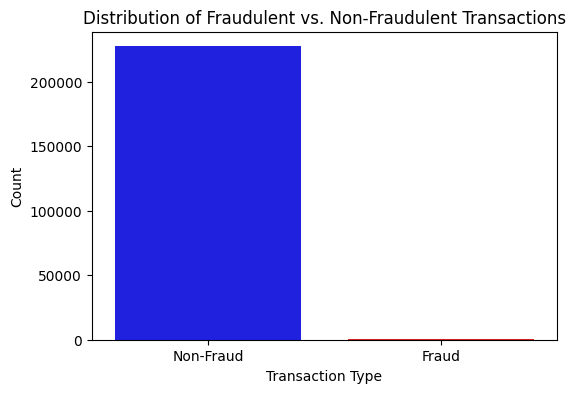

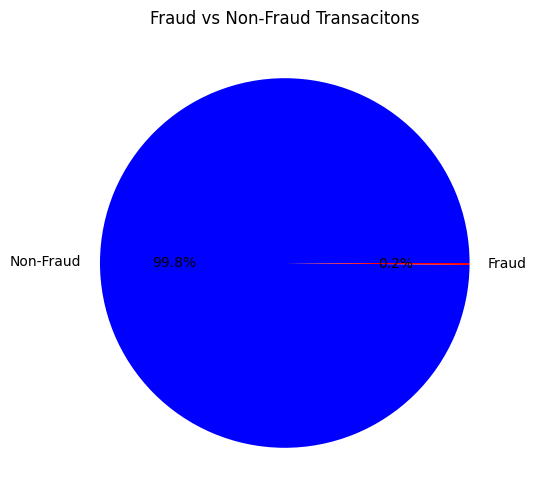

In [26]:
# Count the number of fraud vs. non-fraud transactions
fraud_counts = train_df['Target'].value_counts()

# Convert the index to a DataFrame for better compatibility
fraud_df = fraud_counts.reset_index()
fraud_df.columns = ['Transaction Type', 'Count']


#Replace values for better readability
fraud_df['Transaction Type'] = fraud_df['Transaction Type'].map({0: 'Non-Fraud', 1: 'Fraud'})
print(fraud_df)

# Bar plot (Fixed)
plt.figure(figsize=(6,4))
sns.barplot(data=fraud_df, x='Transaction Type', y='Count', hue='Transaction Type', palette=['blue', 'red'], legend=False)
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Fraudulent vs. Non-Fraudulent Transactions")
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(fraud_counts, labels=['Non-Fraud','Fraud'], autopct='%1.1f%%', colors=['blue','red'])
plt.title("Fraud vs Non-Fraud Transacitons")
plt.show()

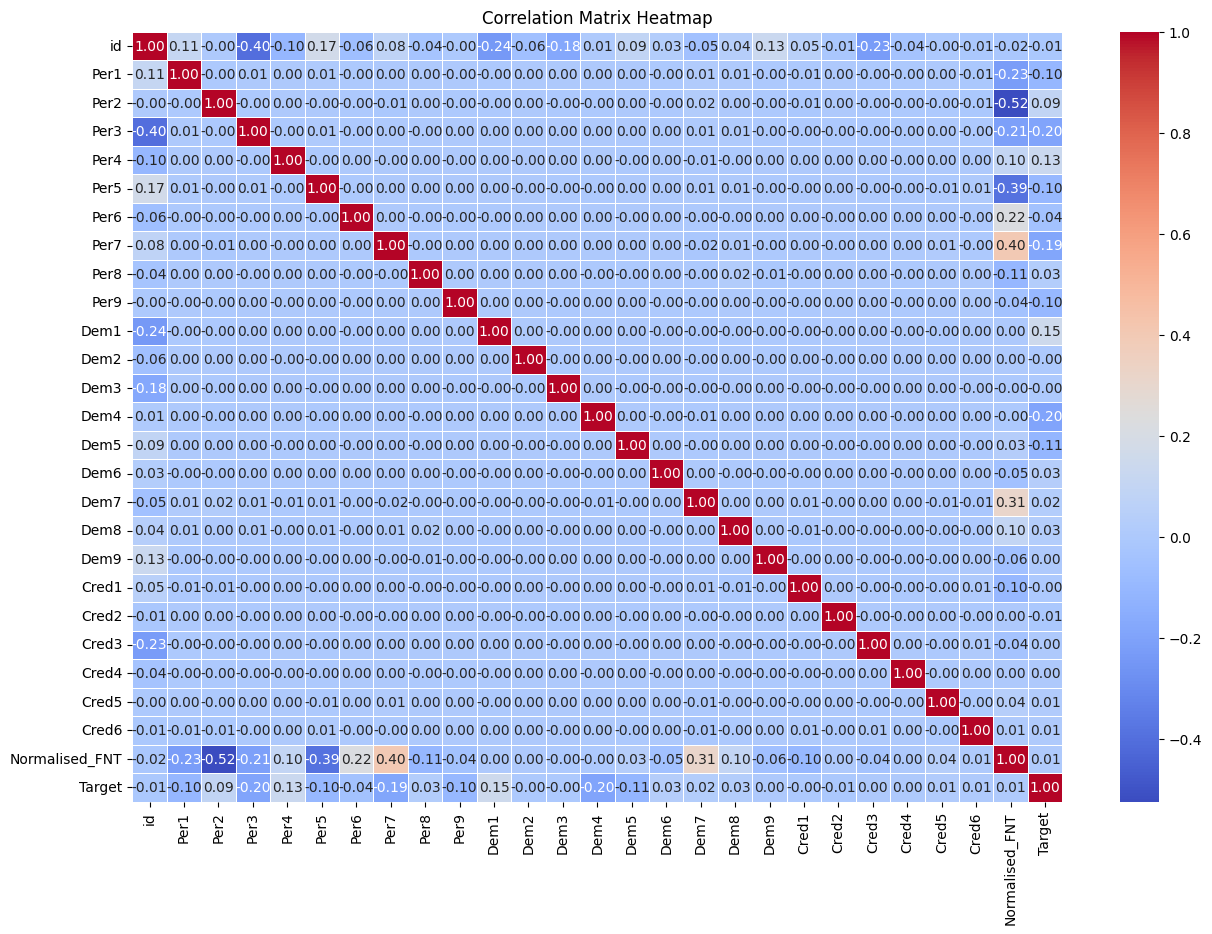

In [ ]:
# Identifying Correlations Between Different Features.

# Select only numeric columns for correlation analysis
numeric_cols = train_df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(15,10))
# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [34]:
# Identify Features Most Correlated with Fraud.
corrrelation_with_target = correlation_matrix['Target'].sort_values(ascending=False)

# Display most correlated features.
print("Features most correlated with Fraud: /n")
print(corrrelation_with_target)

Features most correlated with Fraud: /n
Target            1.000000
Dem1              0.150343
Per4              0.133657
Per2              0.093530
Dem6              0.034915
Per8              0.028638
Dem8              0.026403
Dem7              0.024294
Cred5             0.011801
Cred6             0.011039
Normalised_FNT    0.005469
Cred3             0.004814
Dem9              0.004088
Cred4             0.003521
Cred1            -0.003342
Dem2             -0.004235
Dem3             -0.004541
Cred2            -0.006884
id               -0.012034
Per6             -0.044604
Per5             -0.099358
Per9             -0.099559
Per1             -0.103576
Dem5             -0.112257
Per7             -0.187741
Dem4             -0.195076
Per3             -0.195099
Name: Target, dtype: float64


Using the following to define what is considered a high correlation between variables.
- High correlation: r-value between 0.7 and 1
- Moderate correlation: r-value between 0.5 and 0.7
- Low correlation: r-value between 0.3 and 0.5
- Very low correlation: r-value below 0.3

Based off the each variable compared to Target variable (fraud & Non-Fraud) all of them have a score of less than 0.3 and -0.3 which indicates these variables are negatively associated with fraud.

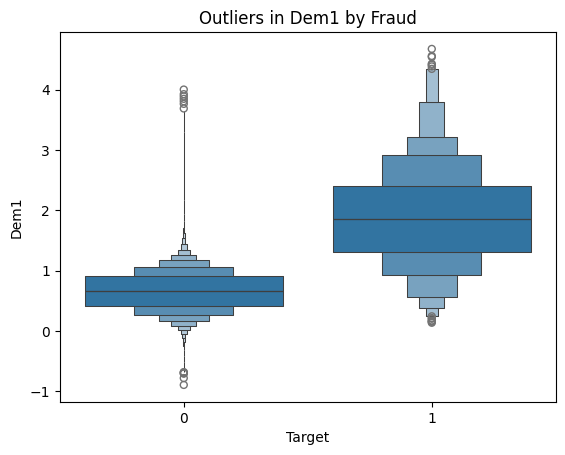

In [43]:
# Check for Outliers in Highly Correlated Features
# Fraud transactions will often show extreme values in certain features. Using a boxplot will help identify these outliers.

# Select the most correlated featurd (excluding target)
top_feature = corrrelation_with_target.index[1] # # Index 1 to skip 'Target' itself

# Create boxplot to visualise outliers
plt.Figure(figsize=(10,6))
sns.boxenplot(x='Target', y=top_feature, data=train_df)
plt.title(f"Outliers in {top_feature} by Fraud")
plt.show()

In [ ]:
# Try the above but with top_5_features instead 
# Do this my creating a for loop.